In [1]:
import pandas as pd # 引用套件並縮寫為 pd  

In [2]:
num_top_word=1000

In [3]:
data_train = pd.read_csv('data/train.csv')  
print(data_train) 

         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UT

In [4]:
data_test = pd.read_csv('data/test.csv')  
print(data_test) 

         id keyword location  \
0         0     NaN      NaN   
1         2     NaN      NaN   
2         3     NaN      NaN   
3         9     NaN      NaN   
4        11     NaN      NaN   
...     ...     ...      ...   
3258  10861     NaN      NaN   
3259  10865     NaN      NaN   
3260  10868     NaN      NaN   
3261  10874     NaN      NaN   
3262  10875     NaN      NaN   

                                                   text  
0                    Just happened a terrible car crash  
1     Heard about #earthquake is different cities, s...  
2     there is a forest fire at spot pond, geese are...  
3              Apocalypse lighting. #Spokane #wildfires  
4         Typhoon Soudelor kills 28 in China and Taiwan  
...                                                 ...  
3258  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...  
3259  Storm in RI worse than last hurricane. My city...  
3260  Green Line derailment in Chicago http://t.co/U...  
3261  MEG issues Hazardous Weather 

In [5]:
data_train=data_train[['text','target']]
data_train

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [6]:
data_train['text']=data_train['text'].str.lower()

In [7]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [8]:
data_train_=data_train['text']

In [9]:
tokenizer=Tokenizer(num_words=num_top_word)
tokenizer.fit_on_texts(data_train_)
seq=tokenizer.texts_to_sequences(data_train_)
seq

[[119, 24, 4, 868, 8, 21, 263, 138, 89, 40],
 [189, 45, 229, 799],
 [40, 7, 6, 24, 136, 20, 39, 441, 256, 57, 6, 714, 24],
 [835, 59, 256, 6, 96],
 [34, 100, 21, 320, 22, 30, 271, 22, 69, 5, 187],
 [378, 96, 800, 869, 6, 665, 563, 7, 399, 45],
 [218, 76, 870, 295, 836, 264, 8, 6],
 [46, 13, 230, 8, 4, 9, 10, 74, 110, 5, 45, 6, 4],
 [422, 43, 75, 256, 51, 6, 4, 594, 871, 4, 769],
 [46, 17, 4, 469, 11, 250, 7, 119, 278],
 [595, 59, 641, 22, 4, 279, 470, 35, 642],
 [872,
  564,
  11,
  231,
  690,
  5,
  715,
  10,
  200,
  6,
  564,
  60,
  175,
  10,
  321,
  71,
  60,
  175,
  10,
  321,
  71,
  264],
 [264, 950, 57, 619, 358, 738],
 [218, 6, 951, 49],
 [232, 7, 187, 423, 13, 6, 130, 92, 359],
 [716, 31, 104],
 [10, 117],
 [332, 11],
 [15, 130, 11, 35, 801],
 [60, 5],
 [21, 11],
 [11, 547],
 [117],
 [60, 5, 94],
 [],
 [39, 152, 10, 143, 17, 223],
 [26, 6, 150, 379],
 [117, 15],
 [],
 [71, 14, 28],
 [4, 333],
 [643, 3, 1, 2],
 [49, 286, 905, 7, 992, 4, 870, 105, 3, 1, 2],
 [359, 58, 837

In [10]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
data_train_

0       our deeds are the reason of this #earthquake m...
1                  forest fire near la ronge sask. canada
2       all residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       just got sent this photo from ruby #alaska as ...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @thetawniest the out of control w...
7610    m1.94 [01:04 utc]?5km s of volcano hawaii. htt...
7611    police investigating after an e-bike collided ...
7612    the latest: more homes razed by northern calif...
Name: text, Length: 7613, dtype: object

In [12]:
one_hot_seq=tokenizer.texts_to_matrix(data_train_,mode='binary')
one_hot_seq

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [13]:
one_hot_seq.shape

(7613, 1000)

In [14]:
word_index=tokenizer.word_index
word_index

{'t': 1,
 'co': 2,
 'http': 3,
 'the': 4,
 'a': 5,
 'in': 6,
 'to': 7,
 'of': 8,
 'and': 9,
 'i': 10,
 'is': 11,
 'for': 12,
 'on': 13,
 'you': 14,
 'my': 15,
 'with': 16,
 'that': 17,
 'it': 18,
 'at': 19,
 'by': 20,
 'this': 21,
 'from': 22,
 'https': 23,
 'are': 24,
 'be': 25,
 'was': 26,
 'have': 27,
 'like': 28,
 'amp': 29,
 'as': 30,
 'up': 31,
 'me': 32,
 'but': 33,
 'just': 34,
 'so': 35,
 'not': 36,
 'your': 37,
 'out': 38,
 'no': 39,
 'all': 40,
 'after': 41,
 'will': 42,
 'an': 43,
 'has': 44,
 'fire': 45,
 "i'm": 46,
 'when': 47,
 'if': 48,
 'we': 49,
 'get': 50,
 'now': 51,
 'new': 52,
 'via': 53,
 'more': 54,
 '2': 55,
 'about': 56,
 'or': 57,
 'news': 58,
 'people': 59,
 'what': 60,
 'they': 61,
 'one': 62,
 'he': 63,
 'how': 64,
 'been': 65,
 'over': 66,
 'who': 67,
 "it's": 68,
 'into': 69,
 "don't": 70,
 'do': 71,
 'video': 72,
 "'": 73,
 'can': 74,
 'emergency': 75,
 'disaster': 76,
 'there': 77,
 'police': 78,
 'than': 79,
 '3': 80,
 'her': 81,
 'u': 82,
 'would': 8

In [15]:
one_hot_seq

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

## 建立model

In [16]:
from keras import layers
from keras import models
from keras import regularizers
from keras.layers import Embedding,Flatten

def create_model():
    model=models.Sequential()
    model.add(Embedding(num_top_word,16,input_shape=(one_hot_seq.shape[1],)))
    model.add(Flatten())
    model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    #model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [17]:
model=create_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 16)          16000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 272,305
Trainable params: 272,305
Non-trainable params: 0
_________________________________________________________________


In [18]:
train_x=one_hot_seq
train_y=data_train['target']

In [19]:
train_x.shape

(7613, 1000)

In [20]:
history=model.fit(train_x,train_y,epochs=100,batch_size=128,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 6090 samples, validate on 1523 samples
Epoch 1/100
6090/6090 [==============================] - 1s 109us/step - loss: 0.7074 - accuracy: 0.5764 - val_loss: 0.7012 - val_accuracy: 0.5345
Epoch 2/100
6090/6090 [==============================] - 0s 31us/step - loss: 0.6766 - accuracy: 0.6066 - val_loss: 0.6611 - val_accuracy: 0.7137
Epoch 3/100
6090/6090 [==============================] - 0s 29us/step - loss: 0.6438 - accuracy: 0.6658 - val_loss: 0.6258 - val_accuracy: 0.7177
Epoch 4/100
6090/6090 [==============================] - 0s 31us/step - loss: 0.6104 - accuracy: 0.7007 - val_loss: 0.6176 - val_accuracy: 0.6802
Epoch 5/100
6090/6090 [==============================] - 0s 31us/step - loss: 0.5739 - accuracy: 0.7350 - val_loss: 0.5823 - val_accuracy: 0.7466
Epoch 6/100
6090/6090 [==============================] - 0s 30us/step - loss: 0.5420 - accuracy: 0.7626 - val_loss: 0.6434 - val_accuracy: 0.6855
Epoch 7/100
6090/6090 [====

6090/6090 [==============================] - 0s 29us/step - loss: 0.2322 - accuracy: 0.9345 - val_loss: 0.7523 - val_accuracy: 0.7492
Epoch 55/100
6090/6090 [==============================] - 0s 28us/step - loss: 0.2296 - accuracy: 0.9325 - val_loss: 0.7480 - val_accuracy: 0.7636
Epoch 56/100
6090/6090 [==============================] - 0s 28us/step - loss: 0.2309 - accuracy: 0.9312 - val_loss: 0.7702 - val_accuracy: 0.7695
Epoch 57/100
6090/6090 [==============================] - 0s 28us/step - loss: 0.2254 - accuracy: 0.9358 - val_loss: 0.7732 - val_accuracy: 0.7321
Epoch 58/100
6090/6090 [==============================] - 0s 28us/step - loss: 0.2258 - accuracy: 0.9356 - val_loss: 0.8046 - val_accuracy: 0.7406
Epoch 59/100
6090/6090 [==============================] - 0s 29us/step - loss: 0.2252 - accuracy: 0.9356 - val_loss: 0.7715 - val_accuracy: 0.7485
Epoch 60/100
6090/6090 [==============================] - 0s 29us/step - loss: 0.2203 - accuracy: 0.9374 - val_loss: 0.8241 - val_a

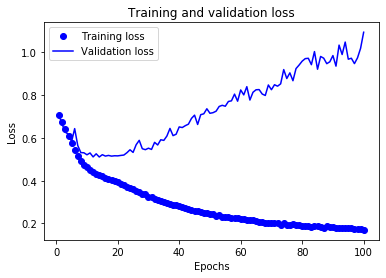

In [21]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
plt.savefig("model_V3-1.png")

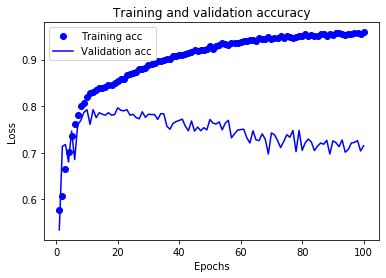

In [22]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
plt.savefig("model_V3-2.png")

# Retraining 

In [23]:
model1=create_model()
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 16)          16000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 272,305
Trainable params: 272,305
Non-trainable params: 0
_________________________________________________________________


In [24]:
history=model1.fit(one_hot_seq,data_train['target'],epochs=15,batch_size=128)

Epoch 1/15
7613/7613 [==============================] - 0s 47us/step - loss: 0.7019 - accuracy: 0.5646
Epoch 2/15
7613/7613 [==============================] - 0s 25us/step - loss: 0.6658 - accuracy: 0.6136
Epoch 3/15
7613/7613 [==============================] - 0s 25us/step - loss: 0.6196 - accuracy: 0.6878
Epoch 4/15
7613/7613 [==============================] - 0s 26us/step - loss: 0.5809 - accuracy: 0.7246
Epoch 5/15
7613/7613 [==============================] - 0s 25us/step - loss: 0.5489 - accuracy: 0.7565
Epoch 6/15
7613/7613 [==============================] - 0s 25us/step - loss: 0.5217 - accuracy: 0.7753
Epoch 7/15
7613/7613 [==============================] - 0s 25us/step - loss: 0.4961 - accuracy: 0.7996
Epoch 8/15
7613/7613 [==============================] - 0s 28us/step - loss: 0.4838 - accuracy: 0.8072
Epoch 9/15
7613/7613 [==============================] - 0s 27us/step - loss: 0.4679 - accuracy: 0.8136
Epoch 10/15
7613/7613 [==============================] - 0s 26us/step - l

In [25]:
model.save('model_V3.h5')